In [64]:
import numpy as np
import matplotlib.pyplot as plt

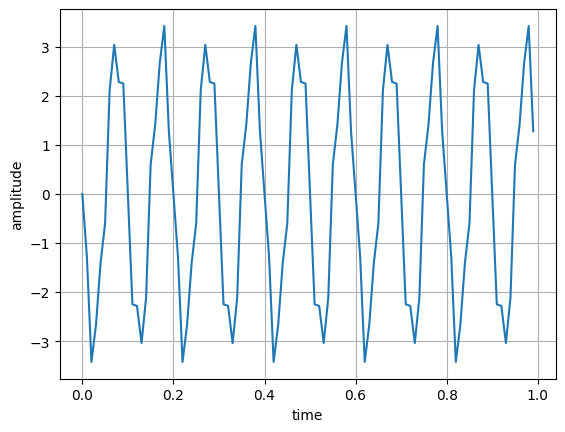

In [58]:
fs = 100
t = np.arange(0, 1, 1/fs)  # 100개 샘플
f1 = 35
f2 = 10
signal = 0.6*np.sin(2*np.pi*f1*t) + 3*np.cos(2*np.pi*f2*t+np.pi/2)

plt.plot(t, signal)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid(True)
plt.show()

In [59]:
# normalization is necessary
fft = np.fft.fft(signal) / len(signal)
fft_magnitude = np.abs(fft)
fft_angle = np.angle(fft)

In [60]:
print(f"fft magnitude shape: {fft_magnitude.shape}")
print(f"fft angle shape: {fft_angle.shape}")

fft magnitude shape: (100,)
fft angle shape: (100,)


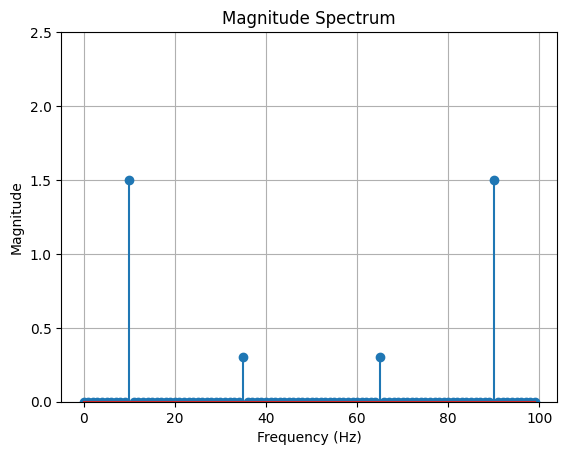

In [62]:
plt.stem(fft_magnitude)
plt.ylim(0.,2.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.grid(True)
plt.show()

- np.fft.fft()는 positive 값 다음에 negative 값을 반환함
- 위 그래프를 기준으로 0~49은 positive, 50~99는 negative에 해당함
- 제대로된 그래프를 얻기 위해, positive에서 negative로 순서로 바꿔줘야 함 
- fs = 100Hz로 잡았기 때문에, x축이 -50Hz~50Hz가 되도록 설정해줘야 함

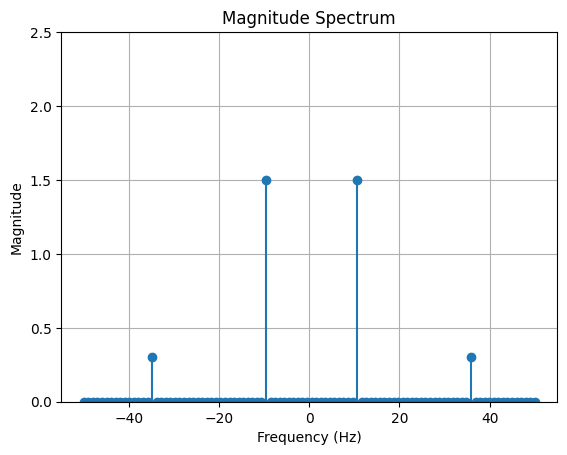

In [65]:
# 신호의 길이 = 샘플 개수
# -50Hz~50Hz까지 일정한 간격으로 생성된 100개의 데이터가 저장됨
length = len(signal)
f = np.linspace(-(fs/2), fs/2, length)

# np.fft.fftshift()는 np.fft.fft() 반환 값 순서를 negative에서 positive로 바꿔주는 함수
# positive 영역만 보고 싶다면 indexing 해주면 됨
plt.stem(f, np.fft.fftshift(fft_magnitude))
plt.ylim(0.,2.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.grid(True)
plt.show()